In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
import h5py
import natsort

with h5py.File('dataset_tumble_0.016_density_0.25.h5') as fin:
    # data = fin[[fin.keys()]]
    data= [fin [i][:] for i in natsort.natsorted(fin.keys())]

In [32]:
data = np.array(data)

In [16]:
def overlap(traj,i,j):
    N = traj[i][traj[i]>0].shape[0]
    return ((traj[i]>0)*(traj[j]>0)).sum()/N

In [28]:
lags = np.arange(0, 100+1,1)
acf =[]
for i in range(0,500,10):
    a = [overlap(data,i,i+lag) for lag in lags]
    acf.append(a)

acf = np.asarray(acf).mean(axis=0)
acf = acf-acf[-1]

acf/= acf.ptp()

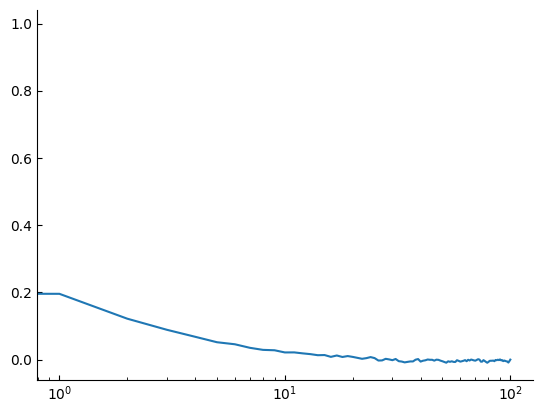

In [31]:
plt.plot(lags,acf)
plt.xscale('log')